In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
#reading csv files and creating data frame
df1 = pd.read_csv('train.csv',encoding= 'unicode_escape')
df2 = pd.read_csv('test.csv',encoding= 'unicode_escape')
df3 = pd.read_csv('dev.csv',encoding= 'unicode_escape')

In [3]:
#concating all into one data frame
frames = [df1, df2, df3]
df = pd.concat(frames)

In [4]:
df.head

<bound method NDFrame.head of                                            Description  Category
0    Was walking along crowded street, holding mums...         0
1    This incident took place in the evening. I was...         0
2    I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...         1
3                   Incident happened inside the train         0
4    I witnessed an incident when a chain was bruta...         0
..                                                 ...       ...
985  I was returning to my home riding a bicycle wh...         1
986  two boys on a bike commented and abused my fri...         1
987  During evening , a guy showed me a middle fing...         1
988  It was a evening time two very young boys were...         0
989   Tried to touch my breast with his elbow and hand         0

[9892 rows x 2 columns]>

In [5]:
df.groupby("Category").describe()

Description                                
               count unique                 top freq
Category                                            
0               6007   5630          harassment   46
1               3885   3465  it was really bad.   61

In [6]:
df.Category[df.Category == 1]="sexual_harassment"
df.Category[df.Category == 0]="no_sexual_harassment"

C:\Users\moshi\AppData\Local\Temp\ipykernel_17236\2852297381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Category[df.Category == 1]="sexual_harassment"


In [7]:
df.dropna(inplace=True)

In [8]:
df.groupby("Category").describe()

Description                                
                           count unique                 top freq
Category                                                        
no_sexual_harassment        6007   5630          harassment   46
sexual_harassment           3885   3465  it was really bad.   61

In [9]:
df.columns

Index(['Description', 'Category'], dtype='object')

In [10]:
#creating binary labels
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Harresment_label"] = lb_make.fit_transform(df["Category"])
df[["Category", "Harresment_label"]].head(11)


,Category,Harresment_label
0,no_sexual_harassment,0
1,no_sexual_harassment,0
2,sexual_harassment,1
3,no_sexual_harassment,0
4,no_sexual_harassment,0
5,no_sexual_harassment,0
6,no_sexual_harassment,0
7,no_sexual_harassment,0
8,no_sexual_harassment,0
9,no_sexual_harassment,0


In [11]:
df

,Description,Category,Harresment_label
0,"Was walking along crowded street, holding mums...",no_sexual_harassment,0
1,This incident took place in the evening. I was...,no_sexual_harassment,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,sexual_harassment,1
3,Incident happened inside the train,no_sexual_harassment,0
4,I witnessed an incident when a chain was bruta...,no_sexual_harassment,0
...,...,...,...
985,I was returning to my home riding a bicycle wh...,sexual_harassment,1
986,two boys on a bike commented and abused my fri...,sexual_harassment,1
987,"During evening , a guy showed me a middle fing...",sexual_harassment,1
988,It was a evening time two very young boys were...,no_sexual_harassment,0


In [12]:
text = df['Description'].values.tolist()

In [13]:
df.groupby("Category").describe()

Harresment_label                                   
                                count mean  std  min  25%  50%  75%  max
Category                                                                
no_sexual_harassment           6007.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
sexual_harassment              3885.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


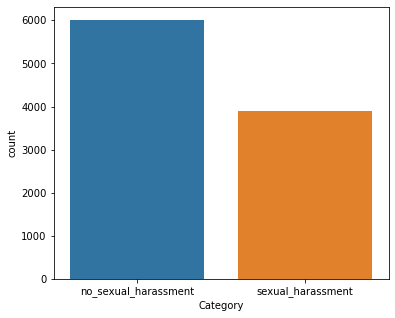

In [14]:
plt.subplots(figsize=(6,5))
sns.countplot(df["Category"])
plt.show()

In [15]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

6014


In [16]:
#importing libraries for data cleaning and preprocessing
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from nltk import word_tokenize,pos_tag


import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer
from nltk.corpus import wordnet

In [17]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
##Lemmatizating the text
WNlemma = nltk.WordNetLemmatizer()

In [18]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(denoise_text)

C:\Users\moshi\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [19]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(remove_special_characters)

In [20]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Description']=df['Description'].apply(remove_stopwords)

{'he', 'this', 'how', 'ain', "don't", "wouldn't", 'further', 'only', "doesn't", "you're", 'not', 'below', 'from', 'then', 'a', 'for', 'were', "that'll", 'aren', 'herself', "mustn't", 'to', 'have', 'did', 'o', 'had', "shouldn't", "you'll", 'they', 'above', 'didn', 'doesn', 'the', 'between', 'out', 'who', "hasn't", 'it', 'there', 'as', 'when', 'so', 'she', 'where', 'each', 'are', 'mustn', 'hers', 'some', 'itself', 'couldn', 'just', 'be', 'mightn', 'them', 'needn', 'until', 'here', 'and', 'him', 'down', 'same', 't', 'me', 'what', 'if', 'will', 'but', 'my', 'hadn', 'hasn', "it's", "couldn't", 'at', 'under', 'their', 'our', 'ours', 'on', 'again', 'once', 'such', 'because', 'than', 'himself', 'these', "you've", 'off', 'should', 'shouldn', "shan't", 'i', 'yourself', 'am', 'most', 'her', 'of', 'own', 'll', "weren't", 'wasn', 'both', 'very', 'his', 'into', 'too', 'having', "needn't", 'was', 'no', 'now', 'in', "didn't", 'through', 'themselves', 'haven', 'yours', 'don', 'about', 'yourselves', "sh

In [21]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

4271


In [22]:
df["Description"]

0      walking along crowded street holding mums hand...
1      incident took place evening metro two guys sta...
2      WAITING BUS MAN CAME BIKE OFFERING LIFTVTO YOU...
3                         Incident happened inside train
4      witnessed incident chain brutally snatched eld...
                             ...                        
985    returning home riding bicycle almost near home...
986    two boys bike commented abused friend leaving ...
987    evening guy showed middle finger called SLUT l...
988    evening time two young boys riding bike roamin...
989                        Tried touch breast elbow hand
Name: Description, Length: 9892, dtype: object

In [23]:
#Define fuction for tokens with part-of-speech = 'noun', 'verb', 'adjective', 'adverb' as deafult only takes noun
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
#Define function for lemmatize the tokens (tokens with part-of-speech = 'noun', 'verb', 'adjective', 'adverb' were lemmatized)
def pre_process_with_pos_tag(text):
    text = text.lower() 
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [WNlemma.lemmatize(t, get_wordnet_pos(pos_tag(word_tokenize(t))[0][1])) for t in tokens]
    text_after_process = " ".join(tokens)
    return text_after_process

#Apply function on description column
df['Description']=df['Description'].apply(pre_process_with_pos_tag)

In [24]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

4084


In [25]:
df['Description']

0      walk along crowd street hold mum hand elderly ...
1      incident take place even metro two guy start star
2      wait bus man come bike offering liftvto young ...
3                           incident happen inside train
4      witness incident chain brutally snatch elderly...
                             ...                        
985    return home rid bicycle almost near home sudde...
986    two boy bike comment abuse friend leave colleg...
987    even guy show middle finger call slut loud eno...
988    even time two young boy rid bike roam around t...
989                          try touch breast elbow hand
Name: Description, Length: 9892, dtype: object

In [26]:
text = df["Description"]

In [27]:
#vectorize
import sklearn
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_tfidf = vectorizer.fit_transform(text) # converting transformed vectors into tf-idf vectors
train_tfidf.shape #vector shape

(9892, 10174)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['Harresment_label'],stratify=df['Harresment_label'],test_size=0.2, random_state=42)

Y_pre = df['Category']
target_names = list(set(Y_pre))

In [30]:
target_names

['sexual_harassment', 'no_sexual_harassment']

In [31]:
X_train

<7913x10174 sparse matrix of type '<class 'numpy.float64'>'
	with 83561 stored elements in Compressed Sparse Row format>

In [32]:
y_train

787     1
6786    1
1987    0
6170    1
1773    1
       ..
1117    0
1241    0
290     1
2987    1
2387    0
Name: Harresment_label, Length: 7913, dtype: int32

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
import seaborn as sn

Test set accuracy 0.764022233451238
                      precision    recall  f1-score   support

   sexual_harassment       0.74      0.95      0.83      1202
no_sexual_harassment       0.86      0.48      0.61       777

            accuracy                           0.76      1979
           macro avg       0.80      0.71      0.72      1979
        weighted avg       0.78      0.76      0.75      1979



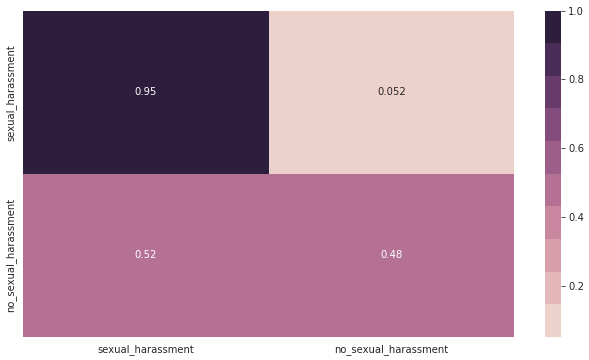

In [35]:
classifer = MultinomialNB()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (11,6))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [36]:
from sklearn.svm import SVC

Test set accuracy 0.8110156644770086
                      precision    recall  f1-score   support

   sexual_harassment       0.79      0.94      0.86      1202
no_sexual_harassment       0.86      0.62      0.72       777

            accuracy                           0.81      1979
           macro avg       0.83      0.78      0.79      1979
        weighted avg       0.82      0.81      0.80      1979



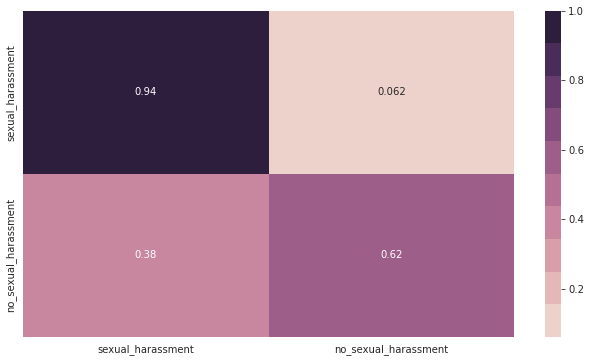

In [37]:
classifer = SVC()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (11,6))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [38]:
from xgboost import XGBClassifier

Test set accuracy 0.8034360788276907
                      precision    recall  f1-score   support

   sexual_harassment       0.80      0.90      0.85      1202
no_sexual_harassment       0.81      0.65      0.72       777

            accuracy                           0.80      1979
           macro avg       0.81      0.78      0.78      1979
        weighted avg       0.80      0.80      0.80      1979



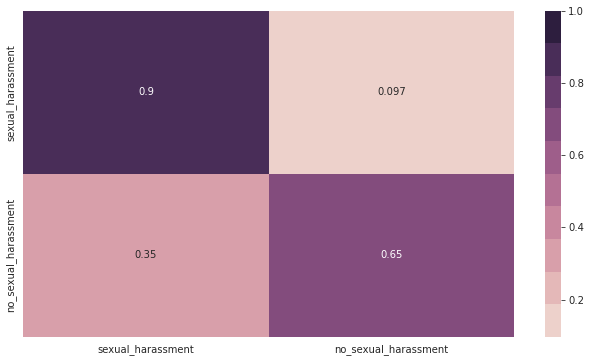

In [39]:
classifer = XGBClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (11,6))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  


In [40]:
from sklearn.ensemble import AdaBoostClassifier


Test set accuracy 0.7943405760485094
                      precision    recall  f1-score   support

   sexual_harassment       0.79      0.90      0.84      1202
no_sexual_harassment       0.81      0.62      0.70       777

            accuracy                           0.79      1979
           macro avg       0.80      0.76      0.77      1979
        weighted avg       0.80      0.79      0.79      1979



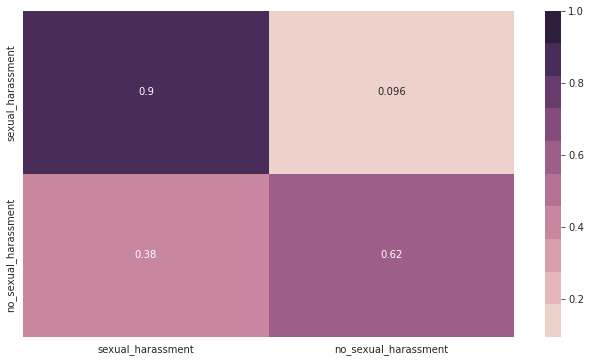

In [41]:
classifer = AdaBoostClassifier(n_estimators=60,
                         learning_rate=1)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (11,6))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  


In [42]:
from sklearn.tree import DecisionTreeClassifier

Test set accuracy 0.7412834765032845
                      precision    recall  f1-score   support

   sexual_harassment       0.78      0.79      0.79      1202
no_sexual_harassment       0.67      0.66      0.67       777

            accuracy                           0.74      1979
           macro avg       0.73      0.73      0.73      1979
        weighted avg       0.74      0.74      0.74      1979



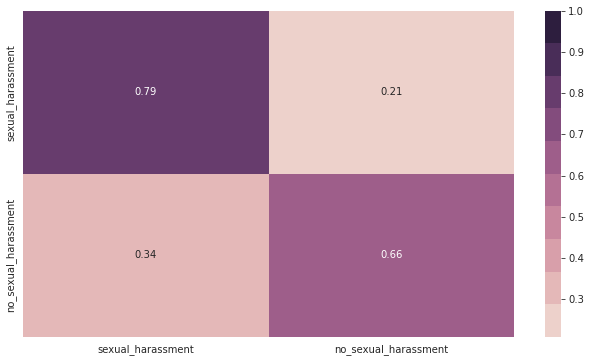

In [43]:
classifer = DecisionTreeClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (11,6))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  


In [44]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.8125315816068721
                      precision    recall  f1-score   support

   sexual_harassment       0.80      0.92      0.86      1202
no_sexual_harassment       0.84      0.64      0.73       777

            accuracy                           0.81      1979
           macro avg       0.82      0.78      0.79      1979
        weighted avg       0.82      0.81      0.81      1979



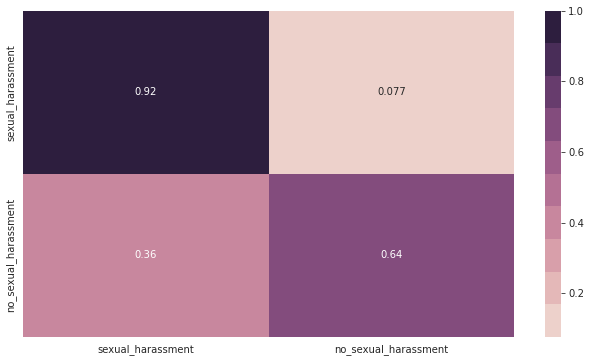

In [45]:
classifer = RandomForestClassifier(n_estimators=100)
shapas = classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (11,6))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [46]:
from sklearn.linear_model import SGDClassifier

Test set accuracy 0.8191005558362809
                      precision    recall  f1-score   support

   sexual_harassment       0.81      0.91      0.86      1202
no_sexual_harassment       0.84      0.67      0.74       777

            accuracy                           0.82      1979
           macro avg       0.82      0.79      0.80      1979
        weighted avg       0.82      0.82      0.81      1979



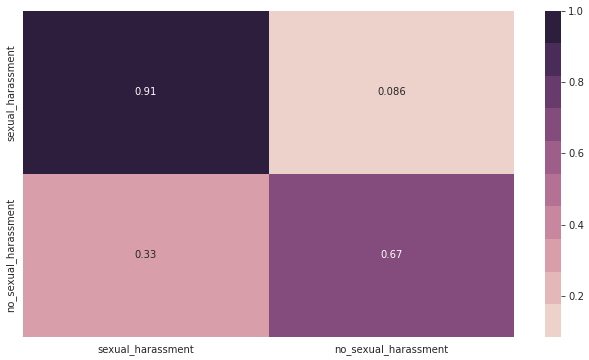

In [47]:
classifer = SGDClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #


cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (11,6))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [48]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

Test set accuracy 0.6771096513390601
                      precision    recall  f1-score   support

   sexual_harassment       0.73      0.74      0.74      1202
no_sexual_harassment       0.59      0.57      0.58       777

            accuracy                           0.68      1979
           macro avg       0.66      0.66      0.66      1979
        weighted avg       0.68      0.68      0.68      1979



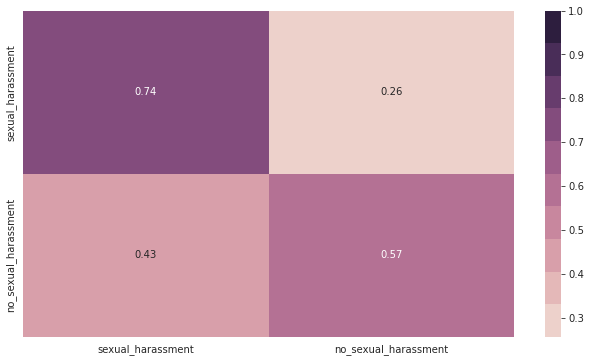

In [49]:
classifer = KNeighborsClassifier(n_neighbors=3)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (11,6))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [50]:
from sklearn.linear_model import LogisticRegression

Test set accuracy 0.8120262758969177
                      precision    recall  f1-score   support

   sexual_harassment       0.79      0.93      0.86      1202
no_sexual_harassment       0.86      0.63      0.72       777

            accuracy                           0.81      1979
           macro avg       0.83      0.78      0.79      1979
        weighted avg       0.82      0.81      0.80      1979



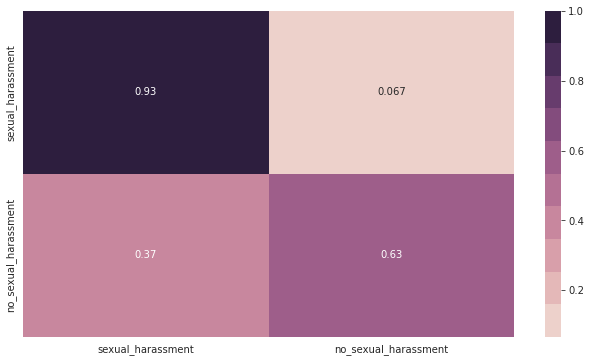

In [51]:
classifer = LogisticRegression()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (11,6))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()